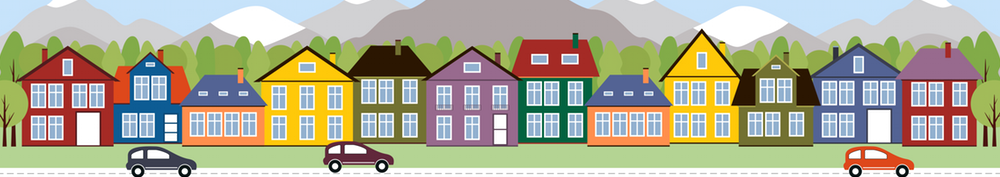

Time flies! You have now learned and (hopefully) mastered all the skills required to build a real-world ML regression model! These skills include:

- Exploratory data analysis (EDA)
- Data pre-processing and feature engineering: scaling, imputation, encoding...
- A suite of regression models: linear regression, trees, forests, ...
- Hyperparamter tuning: CV, GridSearch...
- Model evaluation

Now it is time to deploy these skills in the real world, build your first "real" ML project, and see how you perform against other data scientists from all over the world!

**Option 1: active Kaggle competition to predict house prices.**


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

You will find the detailed description of the competition from above web site, and can download the data directly there. 

**Option 2: Santa Clara Valley Transportation Authority Open Data Portal (10% bonus points)**

https://data.vta.org

You will use the data from the portal above to build something that you think is useful. There are no requirements on what you can/will build - so you are free to use your creativity to build something that is impactful. We only ask that you must use one of the machine learning models we learned in this class.

For inspirations, you can refer to winning projects from the Open Data Challenge for Public Transportation in Tokyo for some good ideas.

https://tokyochallenge.odpt.org/2021/award/index-e.html

**Requirements:**

- Please use this notebook to create your code, explanation, graphs, and results just like what you did for your homework.
- For option 1, each group should create a Kaggle account and submit the prediction of your model in Kaggle. Please add "SCU_" in front of your team name so that you can check how you rank among your classmates in the Leaderboard. However, you do not have to use your real name in your team name.
- For option 1, you can submit your results multiple times in Kaggle. Therefore you are encouraged to submit your model, improve, then re-submit. It is a continuous learning process.
- **For option 1, please include a screenshot of your best Kaggle submission at the bottom of this notebook showing your rank and score in the leaderboard.**
- For option 2, you do not need to submit your results in Kaggle. You should include all of your code, charts, and write-ups in this notebook.
- For option 2, you will earn additional 10% bonus points. For example, if you earn full score of 25 points (from excellent work and presentation), you will earn 10%*25=2.5 points if you choose option 2, so your total score will be 27.5.
- For both option 1 and 2, please include all the steps of a machine learning project, including EDA, data pre-processing, feature engineering, machine learning modeling, hyperparameter tuning, and model evaluation.
- You are encouraged to read online forums to learn and get your inspiration, but code copying is strictly forbidden.
- There is no need to create a separate presentation. You should use this notebook to present your work.
- **Honor code: again, you cannot copy code. We will check your code and you will be asked to present in class (so you need to be extremely familiar with your work)!**

### Good luck!

In [1]:
# your code starts here:

### Disable warnings

import warnings
warnings.filterwarnings('ignore')

### Importing needed packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



### Loading Data

#Load train data
train = pd.read_csv('train.csv')
train.head()

# Columns where nan can be replaced with 'N/A'
nan_columns = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
             'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual',
             'GarageCond','PoolQC','Fence','MiscFeature']

# Filling nan columns with 'N/A' if appropriate

train[nan_columns] = train[nan_columns].fillna('N/A', axis=1)


#Load test data
test = pd.read_csv('test.csv')
test.head()

# Filling nan columns with 'N/A' if appropriate

test[nan_columns] = test[nan_columns].fillna('N/A', axis=1)

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,N/A,Reg,Lvl,AllPub,...,0,N/A,N/A,N/A,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,N/A,IR1,Lvl,AllPub,...,0,N/A,N/A,N/A,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,N/A,IR1,Lvl,AllPub,...,0,N/A,N/A,N/A,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,N/A,IR1,Lvl,AllPub,...,0,N/A,N/A,N/A,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,N/A,Reg,Lvl,AllPub,...,120,0,N/A,MnPrv,N/A,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,N/A,IR1,Lvl,AllPub,...,0,0,N/A,N/A,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,N/A,IR1,Lvl,AllPub,...,0,0,N/A,MnPrv,N/A,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,N/A,IR1,Lvl,AllPub,...,0,0,N/A,N/A,N/A,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,N/A,IR1,HLS,AllPub,...,144,0,N/A,N/A,N/A,0,1,2010,WD,Normal


In [4]:
train.loc[:,train.isnull().any()].isna().sum()

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

The NaN values usually mean the features aren't present so we will fill the NaN with N/A

In [5]:
nan_columns = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
             'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual',
             'GarageCond','PoolQC','Fence','MiscFeature']

In [6]:
train[nan_columns] = train[nan_columns].fillna('N/A', axis=1)

In [7]:
train.loc[:,train.isnull().any()].isna().sum()

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

The rest of these nan values will be fixed with the ColumnTransformer used later. Now we need to do the same to the test data.

In [8]:
#Load test data
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
test[nan_columns] = test[nan_columns].fillna('N/A', axis=1)

In [10]:
test.loc[:,test.isnull().any()].isna().sum()

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

In [11]:
### Initial train/validation set splitting for model selection

# Split training set into train and validation set for model development
target = 'SalePrice'

# Dropping Id column from train and test sets; they don't provide any information, and they interfere with the model

train = train.drop('Id', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(train.loc[:,train.columns != target], train[target],
                                                                test_size=0.2, random_state=1)

X_test = test.drop('Id', axis=1)

In [12]:
### Preprocessing

# List of numerical and categorical features in dataframe

num_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
                'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
                'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold',]

cat_features = X_train.loc[:,~X_train.columns.isin(num_features)].columns

In [13]:
# ColumnTransformer to scale and impute numerical features, then encode and impute categorical features

prep_steps = [
    ('num', Pipeline(
        [('impute', SimpleImputer(strategy='median')),
         ('rescale', StandardScaler())]), num_features),
     ('cat', Pipeline(
         [('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features)]

preprocess = ColumnTransformer(prep_steps)

In [14]:
## Lasso Model: First Try

from sklearn.linear_model import Lasso

lasso_model = Pipeline([('prep', preprocess),
    ('poly', PolynomialFeatures()),
    ('lasso', Lasso())])

lasso_model = lasso_model.fit(X_train,y_train)
 
# Lasso_model metrics

lasso_train_pred = lasso_model.predict(X_train)

lasso_valid_pred = lasso_model.predict(X_valid)


print('Train MAE: {:.3f}'.format(mean_absolute_error(y_train,lasso_train_pred)))
print('Train MSE: {:.3f}'.format(mean_squared_error(y_train,lasso_train_pred)))
print('Train r2_score: {:.3f}'.format(r2_score(y_train,lasso_train_pred)))
print('')
print('Valid MAE: {:.3f}'.format(mean_absolute_error(y_valid,lasso_valid_pred)))
print('Valid MSE: {:.3f}'.format(mean_squared_error(y_valid,lasso_valid_pred)))
print('Valid r2_score: {:.3f}'.format(r2_score(y_valid,lasso_valid_pred)))

Train MAE: 177.519
Train MSE: 88172.851
Train r2_score: 1.000

Valid MAE: 22830.139
Valid MSE: 1529062046.876
Valid r2_score: 0.786


In [ ]:
### Tuning Alpha
## Note: We are using the full training data since we're using GridSearchCV to tune alpha, which doesn't need a validation set.

from sklearn.model_selection import GridSearchCV

# Grid-Search for best alpha for Lasso to minimize test loss

param_grid = {'lasso__alpha': np.logspace(-5, 5, 15)}
print(param_grid)

grid = GridSearchCV(lasso_model, param_grid,
                    scoring='neg_mean_squared_error', cv=5, verbose=1)
grid.fit(train.loc[:, train.columns != target], train[target])

# Best alpha

alpha = list(grid.best_params_.values())
print(grid.best_params_)
print(grid.best_score_)

{'lasso__alpha': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05])}
Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
### Lasso Model: Tuned Alpha
## Note: we are using the full training data now to maximize fitting


lasso_model = Pipeline([('prep', preprocess),
                        ('poly', PolynomialFeatures(degree=2)),
                        ('lasso', Lasso(alpha=alpha[0]))])

lasso_model = lasso_model.fit(train.loc[:, train.columns != target], train[target])

# Lasso_model metrics

lasso_train_pred = lasso_model.predict(train.loc[:, train.columns != target])

print('Train MAE: {:.3f}'.format(mean_absolute_error(train[target], lasso_train_pred)))
print('Train MSE: {:.3f}'.format(mean_squared_error(train[target], lasso_train_pred)))
print('Train r2_score: {:.3f}'.format(r2_score(train[target], lasso_train_pred)))

In [ ]:
## PCA to reduce dimensionality in an attempt to fix overfitting

from sklearn.decomposition import PCA

# Explained variance plot
x = range(1,len(X_train_transformed_df.columns)+1,1)
y=[]

for i in x:
    pca = PCA(n_components=i)
    explained_var = pca.fit(X_train_transformed_df).explained_variance_ratio_
    y.append(np.sum(explained_var))

plt.plot(x,y, marker='o')
plt.title('Explained Variance per Number of Components')
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance_ratio')
plt.grid(which='both')

In [ ]:
pca = PCA(n_components=26)
X_train_pca = pca.fit_transform(X_train_transformed_df.copy())
X_train_pca.shape

x = range(1,27)
explained_ratios = pca.fit(X_train_pca).explained_variance_ratio_

plt.bar(x,explained_ratios)
plt.title('Explained Variance Ratio per Component')
plt.xlabel('component')
plt.ylabel('explained_variance_ratio_')

In [ ]:
explained_ratios

In [ ]:
### Create submission file to submit to Kaggle contest

test_pred = lasso_model.predict(test)

Submission = pd.DataFrame({'Id':test['Id'],'SalePrice':test_pred})

Submission.to_csv('Submission.csv', index=False)

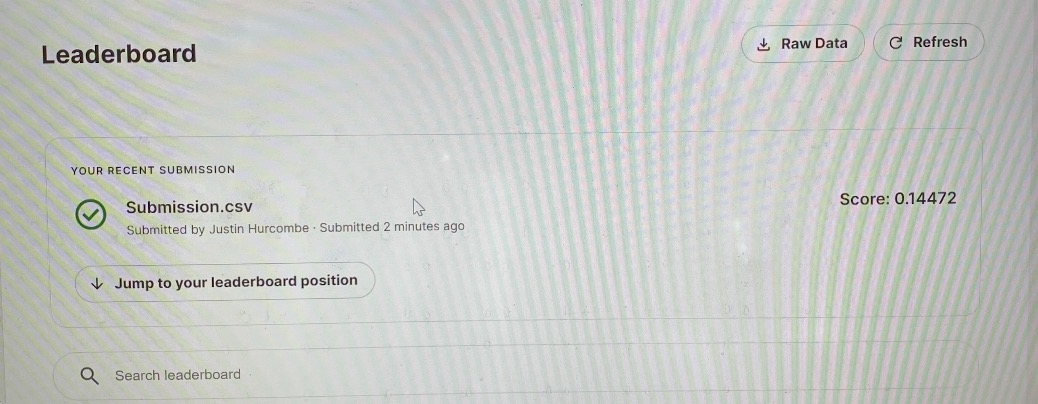